# Pattern recognition - MsCV ViBOT

Guillaume Lemaitre - Fabrice Meriaudeau - Joan Massich

In [136]:

%matplotlib inline
%pprint off

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('glemaitre', 'se04g0bmi2')

from scipy.stats import ttest_ind
from scipy.stats.mstats import betai

import numpy as np


Pretty printing has been turned ON


## Features selection

### Student's t-test

The Student's t-test allow to determine if two given sets are significantly different from each other. 

In our case, we want to determine if the different classes composing a single feature dimension are significantly different. To do so, we will test whether the mean values of both classes in a feature dimension will differ significantly. Assuming that the data in the classes are normally distributed (and an assumption about the variance), the so-called t-test is a popular choice.

The goal of the t-test is to determine which of the following hypothesis is true:

* H1: the mean values of the feature in the two classes are different (*alternative hypothesis*),
* H0: the mean values of the feature in the two class are equal (*null hypothesis*).

If the *null hypothesis* holds true, the feature is discarded since that the classes cannot be easily separeted. If the *alternative hypothesis* holds true, the feature is selected since that the classes are easily separable. The hypothesis test is carried out against the so-called significance level, $\rho$, which corresponds to the probability of committing an error in our decision. Typical values are $\rho=0.05$ and $\rho= 0.001$.

#### Student's distribution and p-value

The following function allows to return the probability of committing an error and is none as p-value. It can be computed using the [regularized incomplete beta function](http://en.wikipedia.org/wiki/Student%27s_t-distribution#Cumulative_distribution_function)

In [137]:

# Define a function to compute the probability for a student's distribution
def StudentDistribution(t_value, deg_freedom):
    return np.squeeze(betai(0.5 * deg_freedom, 0.5, deg_freedom/(deg_freedom + t_value*t_value)).reshape(t_value.shape))


#### Statistical t-test

Given two classes $x_1$ and $x_2$ as well as the significance level $\rho$, the test will return if the *null hypothesis* is rejected or not. We assume equal number of samples in each class and a shared covariance between the two classes.

The following steps have to be performed.

* Estimate the mean $\bar{x_1}$ and $\bar{x_2}$ for each class,
* Estimate the common (assumption) covariance such that $s_{x_1,x_2} = \sqrt{\frac{1}{2} (s_{x_1}^{2} + s_{x_2}^{2}})$,
* Compute the t-value such that $t = \frac{\bar{x_1} - \bar{x_2}}{s_{x_1,x_2} \sqrt{\frac{2}{n}}}$ with $n$ the number of samples in one class,
* Compute the degree of freedom $\nu$ such that $\nu = 2 n - 2$,
* Given the t-value and the degree of freedom, compute the p-value assuming a Student's distribution


(a) Complete the following code in order to implement the t-test.

In [138]:

# Definition of a function to make t-test
def t_test(x1, x2, p):
    
    #Extract the number of samples
    n = np.shape(x1)
    n = n[0]
    
    # Estimate the mean and variance
    ### Use np.mean()
    est_mean_1 = np.mean(x1)
    
    est_mean_2 = np.mean(x2)
    ### Use np.std()
    est_var = np.sqrt(1/2.0*(np.std(x1)**2 + np.std(x2)**2))
    
    # Compute the t-value
    t = (est_mean_1 - est_mean_2) / est_var / np.sqrt(2 / n)
    
    # Define the degree of freedom
    df = 2*n - 2
    
    # Compute the probability
    p_value = StudentDistribution(t, df)
    
    return (p_value > p)
    

#### Experiment

(b) Repeat 5 times the following experiment:

* Generate two classes such that:

    * Class #1 follows a normal distribution $\mathcal{N}(8.8, 4.)$ with 1000 samples,
    * Class #2 follows a normal distribution $\mathcal{N}(9, 4.)$ with 1000 samples.

* Plot the distrbution of each class,
* Apply the Student's t-test for significance level of $\rho=0.05$ and $\rho= 0.001$ and check if the *null hypothesis is rejected or not.

For your information, you can find an example of implementation of the Student's t-test using Scipy library which you can use for your future experimentations.

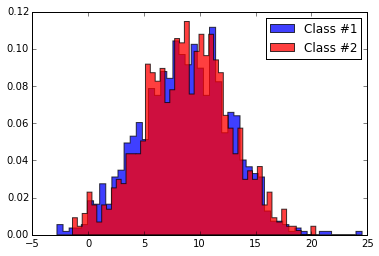

The null hypothesis is False with p=0.001
The null hypothesis is False with p=0.05
The statistic computed directly with scipy implementation are: t-value=-0.995453855373 and p-value=0.319636116195


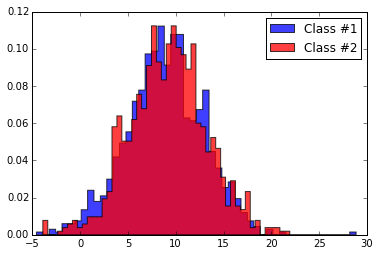

The null hypothesis is False with p=0.001
The null hypothesis is False with p=0.05
The statistic computed directly with scipy implementation are: t-value=-1.64663109676 and p-value=0.0997911575135


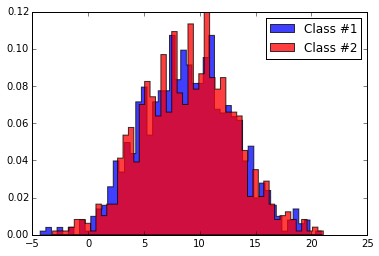

The null hypothesis is False with p=0.001
The null hypothesis is False with p=0.05
The statistic computed directly with scipy implementation are: t-value=-0.339780801741 and p-value=0.734057320312


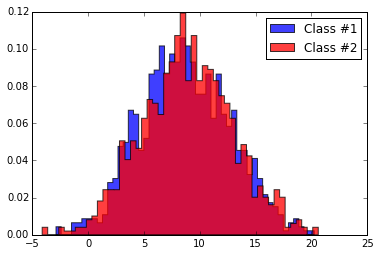

The null hypothesis is False with p=0.001
The null hypothesis is False with p=0.05
The statistic computed directly with scipy implementation are: t-value=-1.06048338909 and p-value=0.289052918546


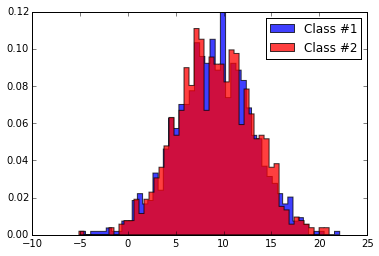

The null hypothesis is False with p=0.001
The null hypothesis is False with p=0.05
The statistic computed directly with scipy implementation are: t-value=-0.591754774138 and p-value=0.554081760356


In [139]:

for i in range(0, 5):
    
    # Declare the mean and std of the different distribution
    mean1, mean2, std = 8.8, 9, 4.
    
    # Define the number of points for each distribution
    n_samples = 1000
    
    # Generate the samples for each class
    ### Use np.random.normal()
    class_1 = np.random.normal(mean1, std, n_samples)
    class_2 = np.random.normal(mean2, std, n_samples)
    
    # Plot the different class
    nb_bins = 50
    
    fig = plt.figure()
    # Plot the PDF of the first class
    n, bins, patches = plt.hist(class_1, nb_bins, normed=1, histtype='stepfilled', label='Class #1')
    plt.setp(patches, 'facecolor', 'b', 'alpha', 0.75)
    # Plot the PDF of the second class
    n, bins, patches = plt.hist(class_2, nb_bins, normed=1, histtype='stepfilled', label='Class #2')
    plt.setp(patches, 'facecolor', 'r', 'alpha', 0.75)
    plt.legend()
    plt.show()
    
    # Check if the null hypothesis is rejected or not
    print 'The null hypothesis is {} with p=0.001'.format(t_test(class_1, class_2, 0.001))
    print 'The null hypothesis is {} with p=0.05'.format(t_test(class_1, class_2, 0.05))
    
    # Implementation in scipy
    [scipy_t_value, scipy_p_value] = ttest_ind(class_1, class_2)
    print 'The statistic computed directly with scipy implementation are: t-value={} and p-value={}'.\
    format(scipy_t_value, scipy_p_value)
    

### Fisher Discriminant Ratio     

The Fisher's Discriminant Ratio (FDR) is commonly employed to quantify the discriminatory power of individual features between two equiprobable classes. In other word, it is independent of the type of the classe distribution.

For a given feature dimension, the FDR for two classes $x_1$ and $x_2$ is defined as:
$$FDR = \frac{(\bar{x_1} - \bar{x_2})^2}{\sigma_{1}^{2} + \sigma_{2}^{2}}$$

(a) Complete the following Python function in order to compute the FDR for each feature dimension of the class $x_{1}$ and $x_{2}$

In [140]:

# Compute the Fisher discriminant ratio 
def FisherDiscriminantRatio(x1, x2):
    
    fdr = np.ravel(np.zeros((np.shape(x1)[1], 1)))
    # Compute the ratio for the different feature dimension
    for dim in range(0, np.shape(x1)[1]):
        
        fdr[dim] = (np.mean(x1[dim]) - np.mean(x2[dim]))**2 / (np.std(x1[dim])**2 + np.std(x2[dim])**2)
    
    return fdr


#### Synthetic example

(b) Generate two classes such that:

* Class #1 follows a multivariate Gaussian distribution with:

$$\mu_1 = \left[ \begin{matrix} 1 & 1 & 0 & 6 & 3 \end{matrix} \right],$$

$$\Sigma_1 = \left[ \begin{matrix} 0.06 & 0 & 0 & 0 & 0 \\ 0 & 0.5 & 0 & 0 & 0 \\ 0 & 0 & 3 & 0 & 0 \\ 0 & 0 & 0 & 0.001 & 0 \\ 0 & 0 & 0 & 0 & 3 \end{matrix} \right].$$

* Class #2 follows a multivariate Gaussian distribution with:

$$\mu_2 = \left[ \begin{matrix} 11.5 & 11 & 10 & 6.5 & 4 \end{matrix} \right],$$

$$\Sigma_2 = \left[ \begin{matrix} 0.06 & 0 & 0 & 0 & 0 \\ 0 & 0.6 & 0 & 0 & 0 \\ 0 & 0 & 34 & 0 & 0 \\ 0 & 0 & 0 & 0.001 & 0 \\ 0 & 0 & 0 & 0 & 4 \end{matrix} \right].$$

* Generate 500 samples for each class.

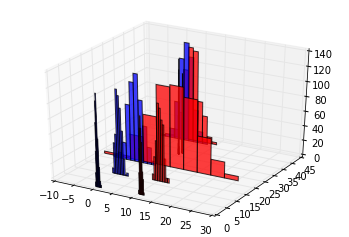

In [141]:

# Define the mean and covariance
### Use np.array() and np.diagflat()
mean1, mean2 = np.array([1, 1, 0, 6, 3]), np.array([11.5, 11, 10, 6.5, 4])
std1, std2 = np.diagflat([0.06, 0.5, 3, 0.001, 3]), np.diagflat([0.06, 0.6, 34, 0.001, 4])

# Define the number of data in each class
n_samples = 500

# Generate the data
### Use np.random.multivariate_normal()
class_1 = np.random.multivariate_normal(mean1, std1, n_samples)
class_2 = np.random.multivariate_normal(mean2, std2, n_samples)

# Plot the different distribution for each dimension
nb_bins = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for dim in range(0, np.size(mean1)):
    # Plot the PDF of the class #1
    bins, n = np.histogram(class_1[:, dim], nb_bins, normed = False)
    ax.bar(n[0:-1], bins, (dim * 10), zdir='y', color='b', alpha=0.75, width=n[1]-n[0], edgecolor='none')
    # Plot the PDF of the class #2
    bins, n = np.histogram(class_2[:, dim], nb_bins, normed = False)
    ax.bar(n[0:-1], bins, (dim * 10) + 1, zdir='y', color='r', alpha=0.75, width=n[1]-n[0], edgecolor='none')
plt.show()


(c) Compute the FDR for the above generated classes.

In [142]:

# Compute the Fisher ratio
### Use the function implemented FisherDiscriminantRatio()
fisher_ratio = FisherDiscriminantRatio(class_1, class_2 )

# Find the most discriminative feature dimension
### Use np.argsort() to know which feature dimension are the most important
print 'The feature dimension can be ordered as {}'.format(np.argsort(fisher_ratio))


The feature dimension can be ordered as [2 3 4 1 0]


#### Real dataset: UCI liver disorders dataset

For this second example, we consider the data of the [UCI liver disorders dataset](https://archive.ics.uci.edu/ml/datasets/Liver+Disorders). Necessary information about the data are available in the following Python cell.

In [143]:

# Attribute information:
###   0. mcv	    mean corpuscular volume
###   1. alkphos	alkaline phosphotase
###   2. sgpt	    alamine aminotransferase
###   3. sgot 	    aspartate aminotransferase
###   4. gammagt	gamma-glutamyl transpeptidase
###   5. drinks	    number of half-pint equivalents of alcoholic beverages drunk per day
###   6. selector   field used to split data into two sets

# Relevant information:
###   -- The first 5 variables are all blood tests which are thought
###      to be sensitive to liver disorders that might arise from
###      excessive alcohol consumption.  Each line in the bupa.data file
###      constitutes the record of a single male individual.
###   -- It appears that drinks>5 is some sort of a selector on this database.

# Load the data/bupa.data
data = np.loadtxt('./data/bupa.data', delimiter=',')

# Split into data and label
### Label are the two clas which is either 0 or 1
label = np.ravel(data[:, -1] - 1)
data = np.asmatrix(data[:, 0 : -1])

(d) Compute the FDR for the above generated classes.

In [144]:
np.fliplr(data)
# Compute the Fisher Discriminant Ratio
fisher_ratio = FisherDiscriminantRatio(data[label==1], data[label==0])
# Find the most discriminative feature dimension
### Use np.argsort() to know which feature dimension are the most important
print 'The feature dimension can be ordered as {}'.format(np.argsort(fisher_ratio))


The feature dimension can be ordered as [4 3 0 1 2 5]


### Measures based on scatter matrices

We define the following Python class 'pr_class' which will be used afterword.

In [145]:

# Define a class for all the information
class pr_class(object):
    def __init__(self, X, y):
        self.n_dims = np.shape(X)[1]
        self.n_samples = np.shape(X)[0]
        self.data = X
        self.gt = y
        self.mean_vec = np.mean(self.data, axis = 0)
        self.cov_mat = (self.data - self.mean_vec).T * (self.data - self.mean_vec) / (float(self.n_samples) - 1.)
        

Scatter matrices are among the most popular measures for quantifying the way feature vectors “scatter” in the feature space. Because of their rich physical meaning, a number of class-separability measures are built around them.

Three such measures are defined as:

$$J_1 = \frac{\text{tr}(S_m)}{\text{tr}(S_w)},$$

$$J_2 = \frac{\det(S_m)}{\det(S_w)},$$

$$J_3 = \text{tr}(S_w^{-1} S_m).$$

(a) Complete the following Python functions to implement the measures $J_1$, $J_2$ and $J_3$.

In [146]:

# Define the different scatter measure
### Use np.trace()
### Use np.linalg.det()
### Use np.linalg.inv()

def J1(Sm, Sw):
    return np.trace(Sm) / np.trace(Sw)

def J2(Sm, Sw):
    return np.linalg.det(Sm) / np.linalg.det(Sm)

def J3(Sm, Sw):
    return np.trace(np.linalg.inv(Sw) * Sm)


(b) Thus, we need to compute the scatter matrices:

* $S_m$ is the covariance matrix for the whole data. The concatenation is performed as an example for the future example,
* $S_w$ corresponds to the sum of the within class variance normalise by the number of classes.

In [147]:

##### X will be a list of 'pr_class' object #####
# Definition of the scatter mixture matrix
def ComputeSm(X):
    # Concatenate all the data to get the mixture covariance
    all_data = np.squeeze([X[count].data for count in xrange(np.size(X))])
    all_data = np.concatenate([all_data[count] for count in xrange(np.shape(all_data)[0])], axis=0)
    ### Return using np.asmatrix() and using np.cov()
    return np.asmatrix(np.cov(np.transpose(all_data)))

# Definition of the scatter within class matrix
### Check the attribute pr_class.cov_mat
def ComputeSw(X):
    Sw = 0.
    for c in range(0, np.size(X)):
        Sw += X[c].cov_mat
    Sw /= np.size(X)
    ### Return using np.asmatrix()
    return np.asmatrix(Sw)


We will use the UCI liver disorders dataset.

In [148]:

# Attribute information:
###   0. mcv	    mean corpuscular volume
###   1. alkphos	alkaline phosphotase
###   2. sgpt	    alamine aminotransferase
###   3. sgot 	    aspartate aminotransferase
###   4. gammagt	gamma-glutamyl transpeptidase
###   5. drinks	    number of half-pint equivalents of alcoholic beverages drunk per day
###   6. selector   field used to split data into two sets

# Relevant information:
###   -- The first 5 variables are all blood tests which are thought
###      to be sensitive to liver disorders that might arise from
###      excessive alcohol consumption.  Each line in the bupa.data file
###      constitutes the record of a single male individual.
###   -- It appears that drinks>5 is some sort of a selector on this database.

# Load the data/bupa.data
data = np.loadtxt('./data/bupa.data', delimiter=',')

# Split into data and label
### Label are the two clas which is either 0 or 1
label = np.ravel(data[:, -1]) - 1
data = np.asmatrix(data[:, 0 : -1])


(c) Normalise the dataset such that they have a Normal distribution $\mathcal{N}(0, 1)$

In [149]:

# Normalise the data using mean and std
### Compute the mean vector
mean_vec = np.mean(data, axis=0)

### Compute the std vector
std_vec = np.std(data, axis=0)

### Normalise the data
data_norm = (data - mean_vec) / std_vec



We are generating all the possible combination of 3 features

In [150]:

from itertools import combinations

# Generate a vector with all the combination with 3 dimension only
iter_comb = combinations(range(6), 3)
all_comb = []
for cb in iter_comb:
    all_comb.append(cb)
print all_comb
print np.shape(all_comb)

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 5), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]
(20, 3)


(d) Compute the the different measures for each combination of feature previosuly generated:

* Define the data subset depending of the current combination,
* Create a list of 'pr_class',
* Compute the matrices $S_m$ and $S_w$,
* Compute the measures $J_1$,$J_2$ and $J_3$.
* Show the best combination of feature for each measure.

In [151]:
  
J_mes = []
for cb in range(0, np.shape(all_comb)[0]):
    
    # Find the number of classes
    ### Use np.unique()
    nb_classes = np.size(np.unique(label))
    
    # Define the data subset depending of the current combination
    data_sub = (data_norm[:,all_comb[cb]])
    
    # Create an object for each class
    classes_pr = [pr_class(data_sub[np.ravel(np.nonzero(label == (np.unique(label)[count]))), :], \
                                   label[np.ravel(np.nonzero(label == (np.unique(label)[count])))]) \
                          for count in xrange(nb_classes)]
    
    # Compute the different sccatter
    Sw = ComputeSw(classes_pr)
    Sm = ComputeSm(classes_pr)
    
    # Compute the different measure
    j1_meas = J1(Sm, Sw)
    j2_meas = J2(Sm, Sw)
    j3_meas = J3(Sm, Sw)
    
    J_mes.append([j1_meas, j2_meas, j3_meas]);

# I prefer matrix
J_mes = np.asmatrix(J_mes)

# Find the best combination
print 'The best feature combination taking into account J1 is {}'.format(all_comb[np.argmax(J_mes[:, 0])])
print 'The best feature combination taking into account J2 is {}'.format(all_comb[np.argmax(J_mes[:, 1])])
print 'The best feature combination taking into account J3 is {}'.format(all_comb[np.argmax(J_mes[:, 2])])


The best feature combination taking into account J1 is (2, 3, 4)
The best feature combination taking into account J2 is (0, 1, 2)
The best feature combination taking into account J3 is (2, 3, 4)


We plot the data in the best combination of 3 features found.

In [156]:

# Define the parameters for the class #1
trace1 = Scatter3d(
    x=np.ravel(data_norm[np.ravel(np.nonzero(label == 0.)), all_comb[np.argmax(J_mes[:, 0])][0]]),
    y=np.ravel(data_norm[np.ravel(np.nonzero(label == 0.)), all_comb[np.argmax(J_mes[:, 0])][1]]),
    z=np.ravel(data_norm[np.ravel(np.nonzero(label == 0.)), all_comb[np.argmax(J_mes[:, 0])][2]]),
    name='Class #1',
    mode='markers', marker=Marker(size=5, line=Line(color='rgba(0,0,255,1.0)', width=0.5), opacity=.8))
# Define the parameters for the class #2
trace2 = Scatter3d(
    x=np.ravel(data_norm[np.ravel(np.nonzero(label == 1.)), all_comb[np.argmax(J_mes[:, 0])][0]]),
    y=np.ravel(data_norm[np.ravel(np.nonzero(label == 1.)), all_comb[np.argmax(J_mes[:, 0])][1]]),
    z=np.ravel(data_norm[np.ravel(np.nonzero(label == 1.)), all_comb[np.argmax(J_mes[:, 0])][2]]),
    name='Class #2',
    mode='markers', marker=Marker(size=5, symbol='diamond', line=Line(color='rgba(255,0,0,1.0)', width=0.5), opacity=.8))
# Concatenate the data
plot_data = Data([trace1, trace2])
# Define the layout
layout = Layout(margin=Margin(l=0, r=0, b=0, t=0))
# Define a figure
fig = Figure(data=plot_data, layout=layout)
py.iplot(fig, filename='projection-fdr')


### Subset searchig algorithm

We will investigate the suboptimal searching techniques/the exhaustive search.

(a) Using the normalised data of the previous exercise, order them using the FDR.

In [153]:

# Order the data depending of the FDR

# Compute the Fisher Discriminant Ratio
fisher_ratio = FisherDiscriminantRatio(classes_pr[0].data, classes_pr[1].data)

# Find the most discriminative feature dimension
print 'The feature dimension can be ordered as {}'.format(np.argsort(fisher_ratio))

data_norm_sorted = data_norm[:, np.argsort(fisher_ratio)]


The feature dimension can be ordered as [0 1 2]


#### Sequential Forward Selection

In [154]:

# Apply the sequential forward selection
def SequentialForwardSelection(data, label, nb_fea_wanted, metric):
       
    k = 1
    cLBest = []
    NofFeatures=np.shape(data)[1];
    while k <= nb_fea_wanted:
        maxJ = 0
        for i in range(0, NofFeatures):
            if (np.size(np.nonzero(cLBest == i)) == 0):
                combi = cLBest
                combi = np.append(combi, i).astype(int)
            else:
                continue
                
            # Select the data
            data_sub = data_norm[:, combi]
            
            # Find the number of classes
            nb_classes = np.size(np.unique(label))
            # Create an object for each class
            classes_pr = [pr_class(data_sub[np.ravel(np.nonzero(label == (np.unique(label)[count]))), :], \
                                   label[np.ravel(np.nonzero(label == (np.unique(label)[count])))]) \
                          for count in xrange(nb_classes)]
            
            classes_pr
            
            # Compute the different sccatter
            Sw = ComputeSw(classes_pr)
            Sm = ComputeSm(classes_pr)
            
            # Compute the different measure
            if metric == 'J1':
                meas = J1(Sm, Sw)
            elif metric == 'J2':
                meas = J2(Sm, Sw)
            elif metric == 'J3':
                meas = J3(Sm, Sw)
  
            if meas > maxJ:
                maxJ = meas
                sofar=combi
                
        cLBest = sofar
        k += 1
        
    return (cLBest, maxJ)
            

(b) Apply the SFS algorithm to select the feature using `J3` as cost function.

In [155]:

# Apply SFS algorithm
feat_sel, metric = SequentialForwardSelection(data_norm, label, 3, metric='J2')
print 'The feature selected are {}'.format(feat_sel)



The feature selected are [0 1 2]


(c) Plot the normalised data in the best 3 features dimensions as previously done.

In [135]:
# Define the parameters for the class #1
trace1 = Scatter3d(
    x=classes_pr[0].data[:,1]
    y=classes_pr[0].data[:,2]
    z=classes_pr[0].data[:,3]
    name='Class #1',
    mode='markers', marker=Marker(size=5, line=Line(color='rgba(0,0,255,1.0)', width=0.5), opacity=.8))
# Define the parameters for the class #2
trace2 = Scatter3d(
    x=classes_pr[1].data[:,1]
    y=classes_pr[1].data[:,2]
    z=classes_pr[1].data[:,3]
    name='Class #2',
    mode='markers', marker=Marker(size=5, symbol='diamond', line=Line(color='rgba(255,0,0,1.0)', width=0.5), opacity=.8))
# Concatenate the data
plot_data = Data([...])
# Define the layout
layout = Layout(margin=Margin(l=0, r=0, b=0, t=0))
# Define a figure
fig = Figure(data=plot_data, layout=layout)
py.iplot(fig, filename='projection-sfs')


SyntaxError: invalid syntax (<ipython-input-135-98918448afa8>, line 4)